# Why did the solution of Exner went wrong on the problem?

### Finding the exact solution
Bueno pues, comencemos escribiendo Exner en 2D. Notamos $q_s(X,Y)=(U,V)$ para coordenadas $(X,Y)$, asi exner se escribe como

$$
\frac{\partial \eta}{\partial t}
=-\frac{1}{\varepsilon_0}\nabla\cdot q_s
=-\frac{1}{\varepsilon_0}\left(\frac{\partial U}{\partial X}+\frac{\partial V}{\partial Y} \right)
$$

Ahora, el vector field que escogimos es
    $$U=-X$$
    $$V=-Y$$
Y si hallamos las derivadas parciales nos da
    $$\frac{\partial U}{\partial X}=-1$$
    $$\frac{\partial V}{\partial Y}=-1$$
ademas el codigo de exner que usamos usa $\varepsilon_0=1$, de modo que la equation queda:

$$
\frac{\partial \eta}{\partial t}
=-\frac{1}{1}( (-1)+(-1) )=2
$$
es decir que la solucion exacta de Exner es $\eta=2t+\eta_0$. En otras palabras, por cada unidad de tiempo (e.g. una hora) que pase la cama del rio se eleva el doble en unidad de espacio (e.g. 2 milimetros).

### But we didn't use the exact solution, right?
Sip, nosotros usamos euler, no la solucion exacta, de modo que discretizamos haciendo:

$$\frac{\partial \eta}{\partial t}\approx\frac{\Delta \eta}{\Delta t}$$
$$\frac{\partial U}{\partial X}\approx\frac{\Delta U}{\Delta X}$$
$$\frac{\partial V}{\partial Y}\approx\frac{\Delta V}{\Delta Y}$$

Pero como $U=-X$ y $V=-Y$ entonces
$$\Delta U=-\Delta X\quad \text{ which implies that}\quad \frac{\Delta U}{\Delta X}=-1 $$
$$\Delta V=-\Delta Y\quad \text{ and therefore also}\quad \frac{\Delta V}{\Delta Y}=-1 $$

de modo que al final, la version discreta de Exner que estamos resolviendo NUMERICAMENTE es:

$$\frac{\Delta \eta}{\Delta t}=-\frac{1}{1}((-1)+(-1))=2$$
es decir
$$\Delta \eta=2 \cdot \Delta t $$
de modo que por cada unidad de tiempo que pase la cama del rio se eleva el doble en unidades de espacio... ehh?? es decir, obtuvimos la misma solucion del metodo numerico??


### So the solution is not only working but is actually an exact solution?
Sip, por la forma que definimos a $U$ y a $V$ el sistema es lineal y euler resuelve de manera exacta este tipo de sistemas. Veamos un par de ejemplos con diferentes valores para $dt\approx \Delta t$ que efectivamente esto esta pasando.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

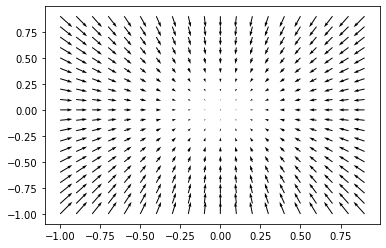

In [15]:
# We first define the range of the x and y values
xrange=np.arange(-1,1,0.1)
yrange=np.arange(-1,1,0.1)

#then we make them into matrices
X,Y=np.meshgrid(xrange,yrange)

#define functions of the vector at every (x,y) location
def Ucomp(xmatrix,ymatrix):
    return -xmatrix

def Vcomp(xmatrix,ymatrix):
    return -ymatrix

#assing them
U=Ucomp(X,Y)
V=Vcomp(X,Y)

#Let's plot
axis=plt.quiver(X,Y,U,V)
plt.show()


In [16]:
#Exner function
def ExnerCalculator(X,Y,Uq,Vq,eps=1,dt=0.1):
    """
    ExnerCalculator takes in the X and Y locations and the vector field defined by U and V and returns the
    deposition/erosion happening at the current time.
    
    Parameters
    ----------
    X: matrix 
        x locations of the flux
    Y: matrix 
        y locations of the flux
    Uq: matrix 
        first components of the flux
    Vq: matrix 
        second components of the flux
    eps: float
        1-porosity of the bed
    dt: float
        time delta for the method

    Returns
    -------
    Xs: matrix 
        x locations with n-1 locations corresponding to dh
    Ys: matrix 
        y locations with n-1 locations corresponding to dh
    dh: matrix
        The difference in elevation in dt time units based on the flux
    """
    m,n=X.shape
    dx=X[0][1]-X[0][0]
    dy=Y[1][0]-Y[0][0]

    #gradient
    dUq=[ [Uq[j][i+1]-Uq[j][i] for i in range(n-1) ] for j in range(m-1) ]
    dVq=[ [Vq[j+1][i]-Vq[j][i] for i in range(n-1) ] for j in range(m-1) ]
    
    #exner
    dh=(-dt/eps)*(dUq/dx+dVq/dy)

    #new Xs and Ys
    Xs=np.array([ [X[j][i] for i in range(n-1) ] for j in range(m-1) ])
    Ys=np.array([ [Y[j][i] for i in range(n-1) ] for j in range(m-1) ])

    return Xs,Ys,dh

Ahora corramos Exner para diferentes valores de $\Delta t$. Vamos a usar $1,\ 0.5,\ 0.2,\ 0.01$ y lo que deberiamos ver es un aumento de elevacion constante de el doble de este valor, es decir $2,\ 1,\ 0.4,\ 0.02$.

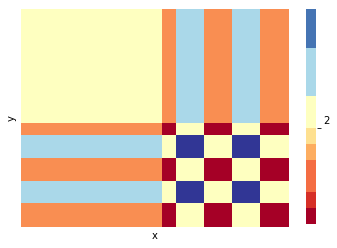

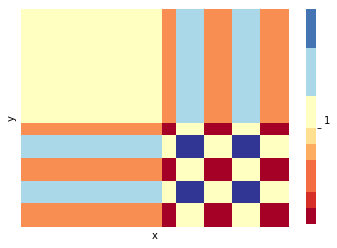

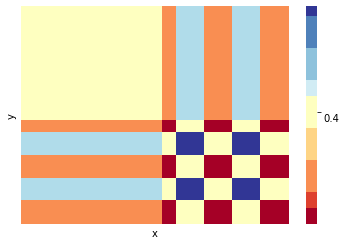

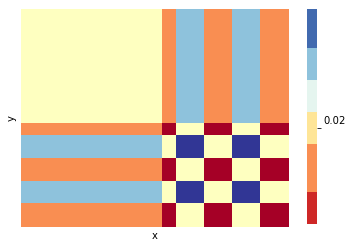

In [17]:
#We will use Exner for different time delta values
T=[1, 0.5, 0.2, 0.01];
for deltat in T:
    #find the solution with Exner
    newx,newy,deltah=ExnerCalculator(X,Y,U,V, dt=deltat)

    #plot the heatmap
    erosion=pd.DataFrame( {"x": newx.flatten() ,"y":newy.flatten(),"erosion": deltah.flatten()} )
    erosion_table=erosion.pivot_table(columns="x",index="y",values="erosion")
    sns.heatmap(erosion_table,cmap="RdYlBu",xticklabels=False,yticklabels=False)
    plt.show();

Entonces que son esas formas tan raras que vemos en el fondo?? Floating point arithmetic error, son numeros muy cercanos pero que el computador no puede guardar con perfecta precision. Podemos verificar diciendole de donde a donde queremos la colorbar en la grafica

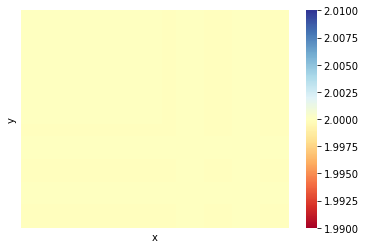

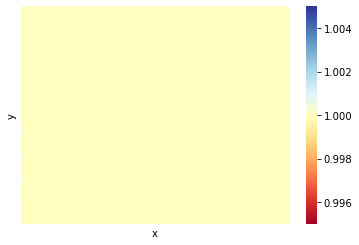

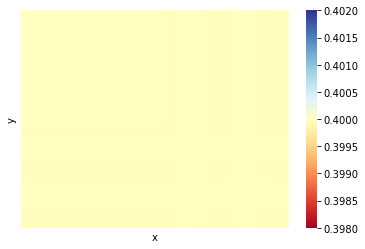

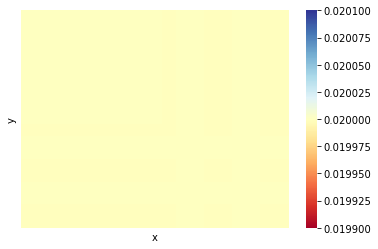

In [22]:
T=[1, 0.5, 0.2, 0.01];
for deltat in T:
    #find the solution with Exner
    newx,newy,deltah=ExnerCalculator(X,Y,U,V, dt=deltat)

    #plot the heatmap
    erosion=pd.DataFrame( {"x": newx.flatten() ,"y":newy.flatten(),"erosion": deltah.flatten()} )
    erosion_table=erosion.pivot_table(columns="x",index="y",values="erosion")
    sns.heatmap(erosion_table,cmap="RdYlBu",xticklabels=False,yticklabels=False, 
        vmin=1.99*deltat,vmax=2.01*deltat) #a small 1% range around the main value 2*deltat
    plt.show();

### So is Exner wrong??
Si... y no. Para entender todo con detalle tendriamos que ver uno o mas cursos. 

La version resumida es que Exner esta resolviendo una equacion de conservacion de material entre la cama del cuerpo de agua y el agua. Pero una de las assumciones para poder llegar a la formula de exner es que el sedimento en el cuerpo de agua encima es constante, de modo que "nunca se acaba" el material que puede depositar.



### An "Example" of this
Imaginen que estamos en una isla y que el agua __siempre se mueve hacia el centro de la isla__ de todas las direcciones y que esa __agua siempre tiene la misma concentracion de arena__. 

Entonces como el flujo de agua se desacelera hacia la isla (quiver plot), entonces  todas las partes en donde este cubierta de agua la isla siempre se esta depositando mas y mas arena, haciendola mas y mas grande.



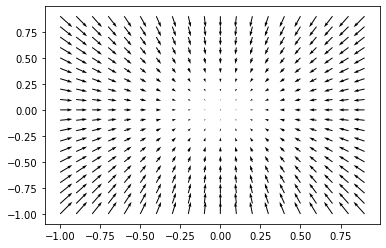

In [23]:
axis=plt.quiver(X,Y,U,V)
plt.show()